In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC, SVR
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Se quiser trabalhar apenas com os dados de Alagoas ou Estados que possuem apenas um CSV, você pode usar o código dessa célula.

# Dados retirados em https://opendatasus.saude.gov.br/dataset/notificacoes-de-sindrome-gripal-leve-2022

# Faz a leitura do arquivo CSV e seleciona apenas as colunas que são necessárias para o trabalho

df = pd.read_csv('D:\\\TCC do Pedro\\part-00000-042a5b76-25dd-4d7c-9e7b-5151096b7d0e.c000.csv', sep=';', usecols=["dataNotificacao", "dataInicioSintomas", "sintomas",
                                                                                              "sexo", "estado", "municipio", "estadoNotificacao", "municipioNotificacao",
                                                                                              "evolucaoCaso", "classificacaoFinal", "idade"])
                                                                                              

In [3]:
'''
# Para o Estado de MG, existem quatro arquivos CSV. Por isso, eu fiz a leitura de cada e após isso concatenei todos os quatro arquivos

df1 = pd.read_csv('part-00000-993ccfe5-ed6a-4b1e-868c-6c0c28a3a8fa.c000.csv', sep=';', usecols=["dataNotificacao", "dataInicioSintomas", "sintomas",
                                                                                              "sexo", "estado", "municipio", "estadoNotificacao", "municipioNotificacao",
                                                                                              "evolucaoCaso", "classificacaoFinal", "idade"])
df2 = pd.read_csv('part-00000-993ccfe5-ed6a-4b1e-868c-6c0c28a3a8fa.c000 (1).csv', sep=';', usecols=["dataNotificacao", "dataInicioSintomas", "sintomas",
                                                                                              "sexo", "estado", "municipio", "estadoNotificacao", "municipioNotificacao",
                                                                                              "evolucaoCaso", "classificacaoFinal", "idade"])
df3 = pd.read_csv('part-00000-993ccfe5-ed6a-4b1e-868c-6c0c28a3a8fa.c000 (2).csv', sep=';', usecols=["dataNotificacao", "dataInicioSintomas", "sintomas",
                                                                                              "sexo", "estado", "municipio", "estadoNotificacao", "municipioNotificacao",
                                                                                              "evolucaoCaso", "classificacaoFinal", "idade"])
df4 = pd.read_csv('part-00000-993ccfe5-ed6a-4b1e-868c-6c0c28a3a8fa.c000 (3).csv', sep=';', usecols=["dataNotificacao", "dataInicioSintomas", "sintomas",
                                                                                              "sexo", "estado", "municipio", "estadoNotificacao", "municipioNotificacao",
                                                                                              "evolucaoCaso", "classificacaoFinal", "idade"])
df = pd.concat([df1, df2, df3, df4])
'''

'\n# Para o Estado de MG, existem quatro arquivos CSV. Por isso, eu fiz a leitura de cada e após isso concatenei todos os quatro arquivos\n\ndf1 = pd.read_csv(\'part-00000-993ccfe5-ed6a-4b1e-868c-6c0c28a3a8fa.c000.csv\', sep=\';\', usecols=["dataNotificacao", "dataInicioSintomas", "sintomas",\n                                                                                              "sexo", "estado", "municipio", "estadoNotificacao", "municipioNotificacao",\n                                                                                              "evolucaoCaso", "classificacaoFinal", "idade"])\ndf2 = pd.read_csv(\'part-00000-993ccfe5-ed6a-4b1e-868c-6c0c28a3a8fa.c000 (1).csv\', sep=\';\', usecols=["dataNotificacao", "dataInicioSintomas", "sintomas",\n                                                                                              "sexo", "estado", "municipio", "estadoNotificacao", "municipioNotificacao",\n                                                              

In [4]:
# Visualiza o dataframe
df

,dataNotificacao,dataInicioSintomas,sintomas,sexo,estado,municipio,estadoNotificacao,municipioNotificacao,evolucaoCaso,classificacaoFinal,idade
0,NaN,2021-05-10,"Tosse, Dispneia",Masculino,Alagoas,Maceió,Alagoas,Maceió,Cura,Síndrome Gripal Não Especificada,1
1,2022-02-07,2022-02-01,Outros,Feminino,Alagoas,Arapiraca,Alagoas,Arapiraca,Em tratamento domiciliar,Confirmado Laboratorial,18
2,NaN,2021-03-16,"Febre, Dor de Garganta, Outros",Feminino,Alagoas,Penedo,Alagoas,Maceió,Cancelado,NaN,22
3,2022-01-11,2022-01-08,"Coriza, Tosse",Feminino,Alagoas,Maceió,Alagoas,Maceió,NaN,NaN,25
4,2020-01-13,2021-08-02,"Coriza, Febre, Outros, Dor de Garganta",Feminino,Alagoas,Arapiraca,Alagoas,Arapiraca,NaN,NaN,30
...,...,...,...,...,...,...,...,...,...,...,...
212959,2022-06-07,2022-06-06,Dor de Garganta,Masculino,Alagoas,Arapiraca,Alagoas,Arapiraca,NaN,NaN,26
212960,2022-05-09,2022-05-06,"Dor de Cabeça, Febre",Feminino,Alagoas,São Miguel dos Campos,Alagoas,São Miguel dos Campos,NaN,NaN,11
212961,2022-06-05,2022-05-30,"Febre, Dispneia, Tosse",Feminino,Alagoas,Maceió,Alagoas,Maceió,NaN,NaN,29
212962,2022-05-31,NaN,Assintomático,Masculino,Alagoas,Maceió,Alagoas,Maceió,NaN,NaN,42


In [5]:
print('Número de óbitos: ', len([i for i in df.evolucaoCaso if i == "Óbito"]))
print('Número de recuperados: ', len([i for i in df.evolucaoCaso if i == "Cura"]))

Número de óbitos:  281
Número de recuperados:  98800


### Gráfico de contagens para a evolução do caso

<AxesSubplot:xlabel='evolucaoCaso', ylabel='count'>

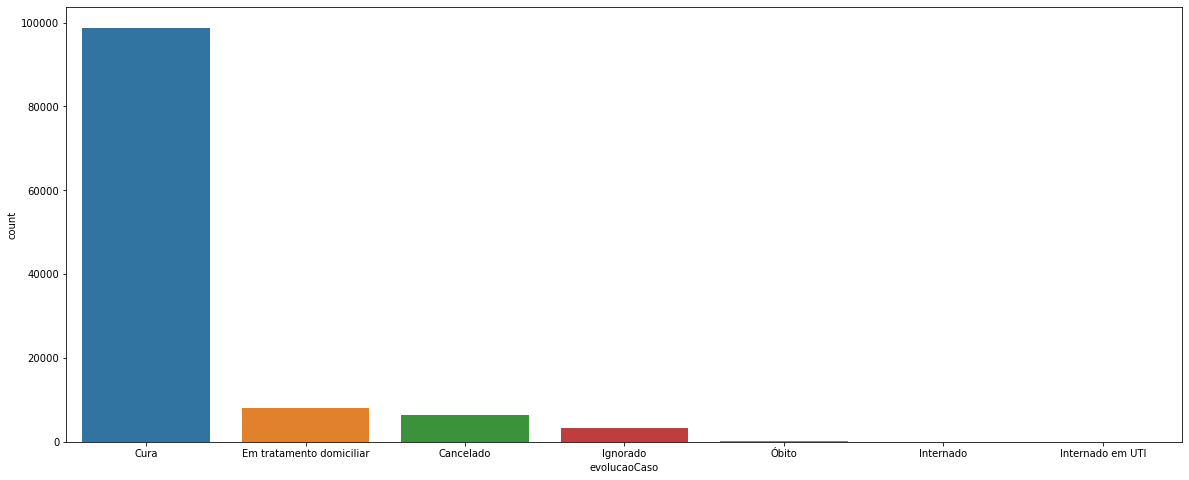

In [6]:
plt.figure(figsize=(20,8))
sns.countplot(df['evolucaoCaso'])

### Média de ocorrência por idade

<AxesSubplot:xlabel='idade'>

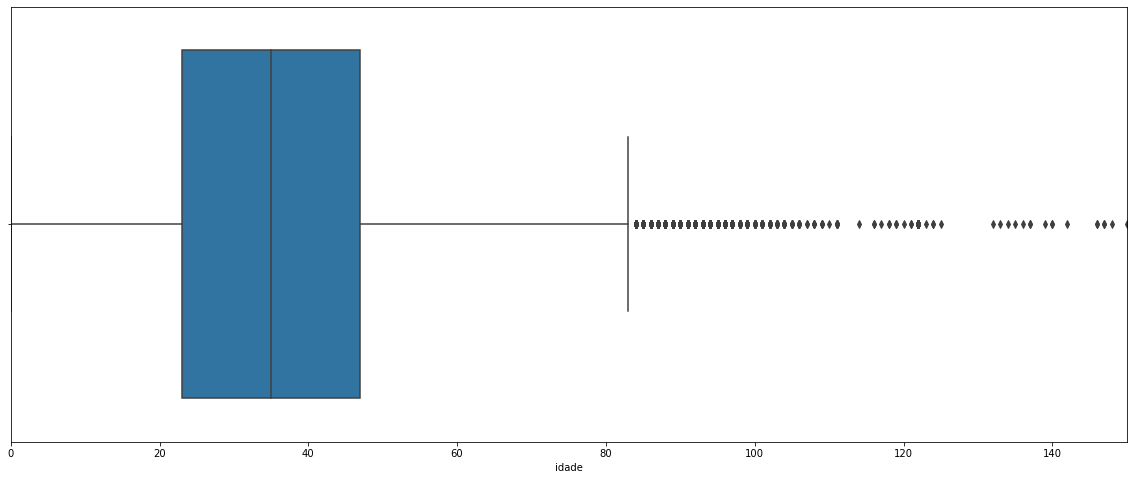

In [7]:
plt.figure(figsize=(20,8))
plt.xlim(xmin=0, xmax = 150)
sns.boxplot(df['idade'])

### Histograma com a idade dos indivíduos

(0.0, 150.0)

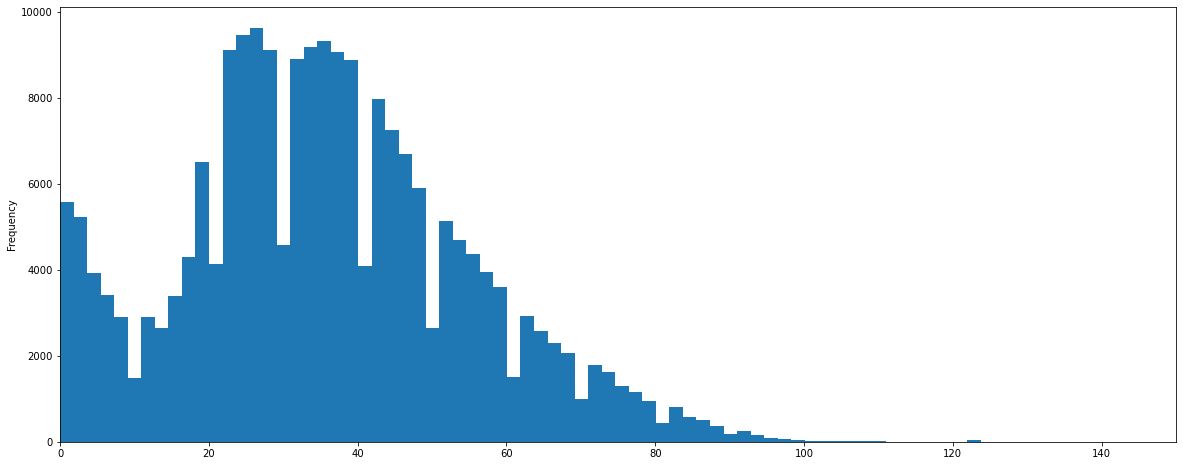

In [8]:
df.idade.plot.hist(figsize=(20, 8), bins=200)
plt.xlim(xmin=0, xmax = 150)

### Gráfico de contagens para a classificação final do indivíduo

<AxesSubplot:xlabel='classificacaoFinal', ylabel='count'>

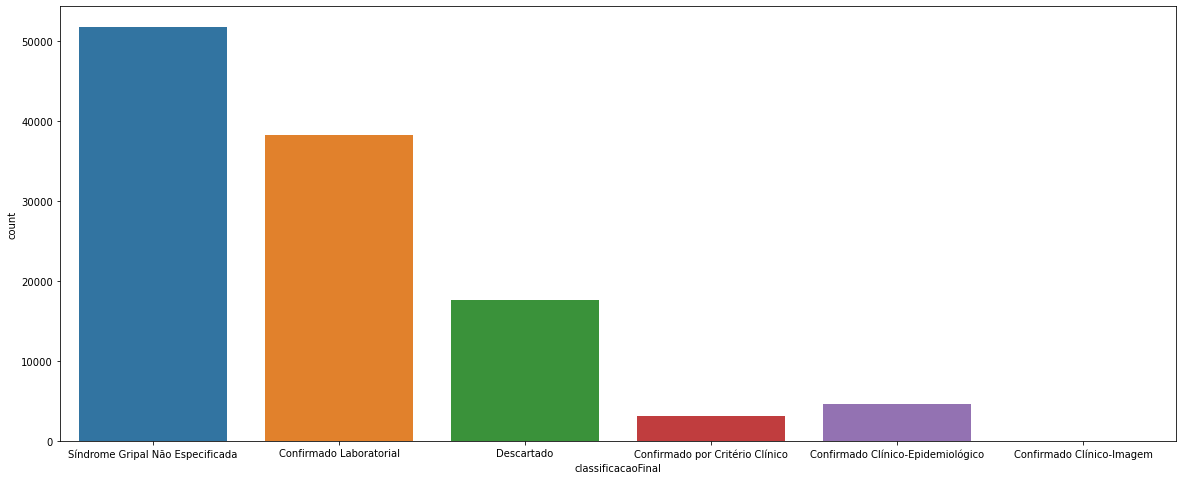

In [9]:
plt.figure(figsize=(20,8))
sns.countplot(df['classificacaoFinal'])

### Gráfico de contagens para o sexo dos indivíduos

<AxesSubplot:xlabel='sexo', ylabel='count'>

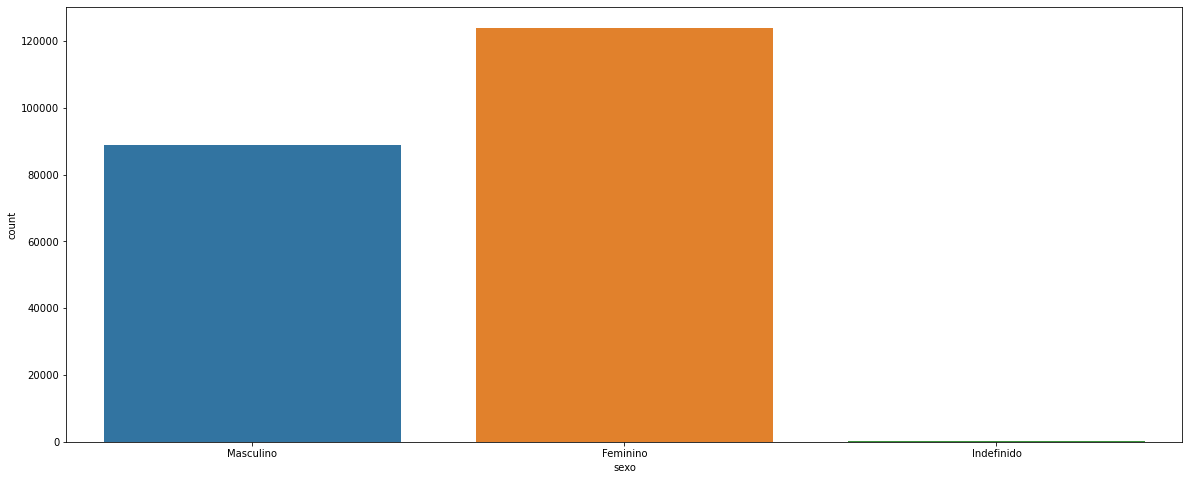

In [10]:
plt.figure(figsize=(20,8))
sns.countplot(df['sexo'])

In [11]:
df['dataNotificacao'] = pd.to_datetime(df['dataNotificacao'])
df['dataNotificacao']

0               NaT
1        2022-02-07
2               NaT
3        2022-01-11
4        2020-01-13
            ...    
212959   2022-06-07
212960   2022-05-09
212961   2022-06-05
212962   2022-05-31
212963   2022-06-09
Name: dataNotificacao, Length: 212964, dtype: datetime64[ns]

In [12]:
df.loc[df['evolucaoCaso'] == 'Óbito', 'obito'] = 1
df.loc[df['evolucaoCaso'] != 'Óbito', 'obito'] = 0 

df.loc[df['evolucaoCaso'] == 'Cura', 'recuperado'] = 1
df.loc[df['evolucaoCaso'] != 'Cura', 'recuperado'] = 0

In [13]:
df['dia_notificacao'] = pd.DatetimeIndex(df['dataNotificacao']).day

In [14]:
df['mes_notificacao'] = pd.DatetimeIndex(df['dataNotificacao']).month

In [15]:
df['ano_notificacao'] = pd.DatetimeIndex(df['dataNotificacao']).year

In [16]:
# Visualiza o dataframe com as novas colunas adicionadas
df

,dataNotificacao,dataInicioSintomas,sintomas,sexo,estado,municipio,estadoNotificacao,municipioNotificacao,evolucaoCaso,classificacaoFinal,idade,obito,recuperado,dia_notificacao,mes_notificacao,ano_notificacao
0,NaT,2021-05-10,"Tosse, Dispneia",Masculino,Alagoas,Maceió,Alagoas,Maceió,Cura,Síndrome Gripal Não Especificada,1,0.0,1.0,NaN,NaN,NaN
1,2022-02-07,2022-02-01,Outros,Feminino,Alagoas,Arapiraca,Alagoas,Arapiraca,Em tratamento domiciliar,Confirmado Laboratorial,18,0.0,0.0,7.0,2.0,2022.0
2,NaT,2021-03-16,"Febre, Dor de Garganta, Outros",Feminino,Alagoas,Penedo,Alagoas,Maceió,Cancelado,NaN,22,0.0,0.0,NaN,NaN,NaN
3,2022-01-11,2022-01-08,"Coriza, Tosse",Feminino,Alagoas,Maceió,Alagoas,Maceió,NaN,NaN,25,0.0,0.0,11.0,1.0,2022.0
4,2020-01-13,2021-08-02,"Coriza, Febre, Outros, Dor de Garganta",Feminino,Alagoas,Arapiraca,Alagoas,Arapiraca,NaN,NaN,30,0.0,0.0,13.0,1.0,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212959,2022-06-07,2022-06-06,Dor de Garganta,Masculino,Alagoas,Arapiraca,Alagoas,Arapiraca,NaN,NaN,26,0.0,0.0,7.0,6.0,2022.0
212960,2022-05-09,2022-05-06,"Dor de Cabeça, Febre",Feminino,Alagoas,São Miguel dos Campos,Alagoas,São Miguel dos Campos,NaN,NaN,11,0.0,0.0,9.0,5.0,2022.0
212961,2022-06-05,2022-05-30,"Febre, Dispneia, Tosse",Feminino,Alagoas,Maceió,Alagoas,Maceió,NaN,NaN,29,0.0,0.0,5.0,6.0,2022.0
212962,2022-05-31,NaN,Assintomático,Masculino,Alagoas,Maceió,Alagoas,Maceió,NaN,NaN,42,0.0,0.0,31.0,5.0,2022.0


### Gráfico de contagens de notificações por dia

<AxesSubplot:xlabel='dia_notificacao', ylabel='count'>

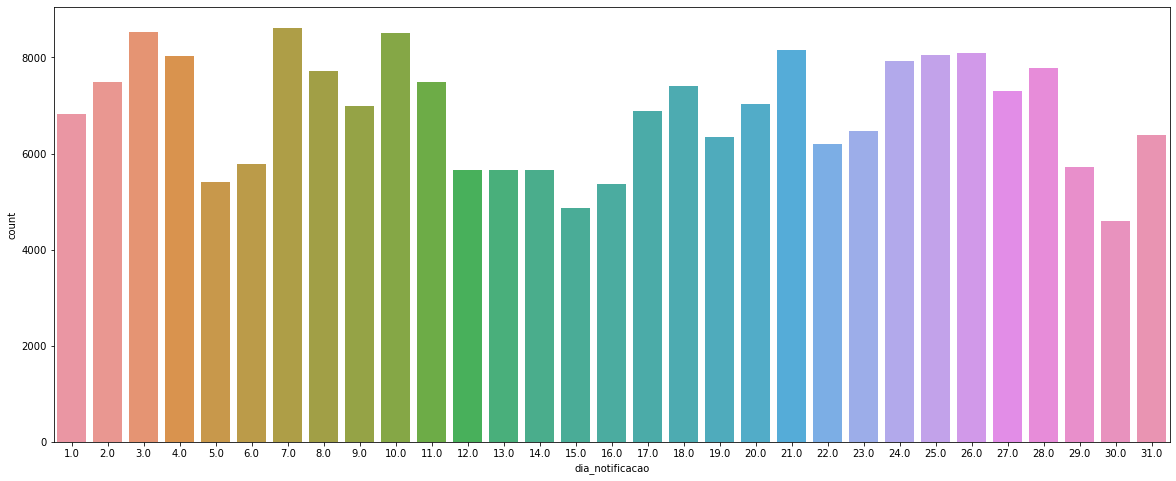

In [17]:
plt.figure(figsize=(20,8))
sns.countplot(df['dia_notificacao'])

### Gráfico de contagens de notificações por mês

<AxesSubplot:xlabel='mes_notificacao', ylabel='count'>

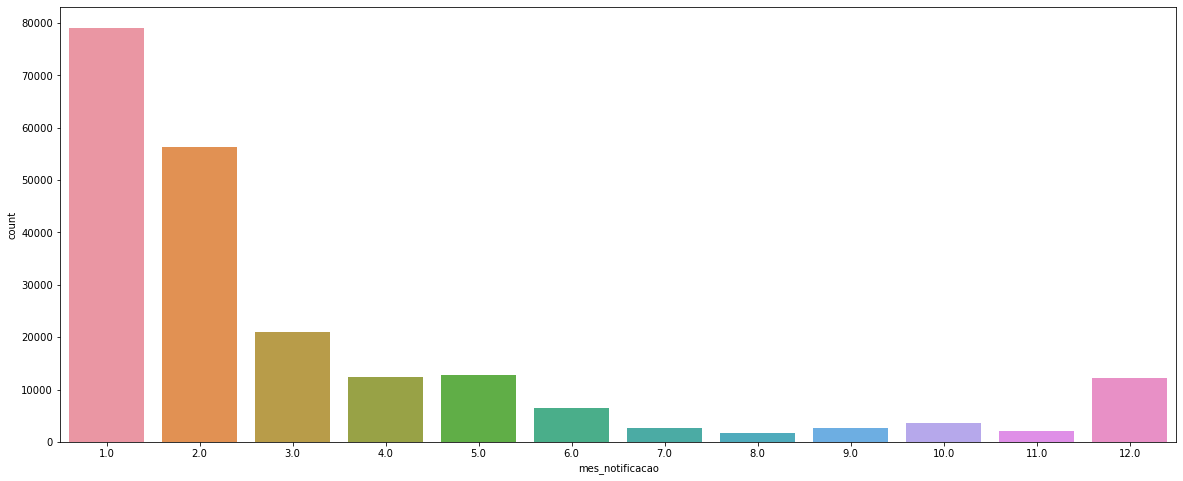

In [18]:
plt.figure(figsize=(20,8))
sns.countplot(df['mes_notificacao'])

### Gráfico de contagens de notificações por ano

<AxesSubplot:xlabel='ano_notificacao', ylabel='count'>

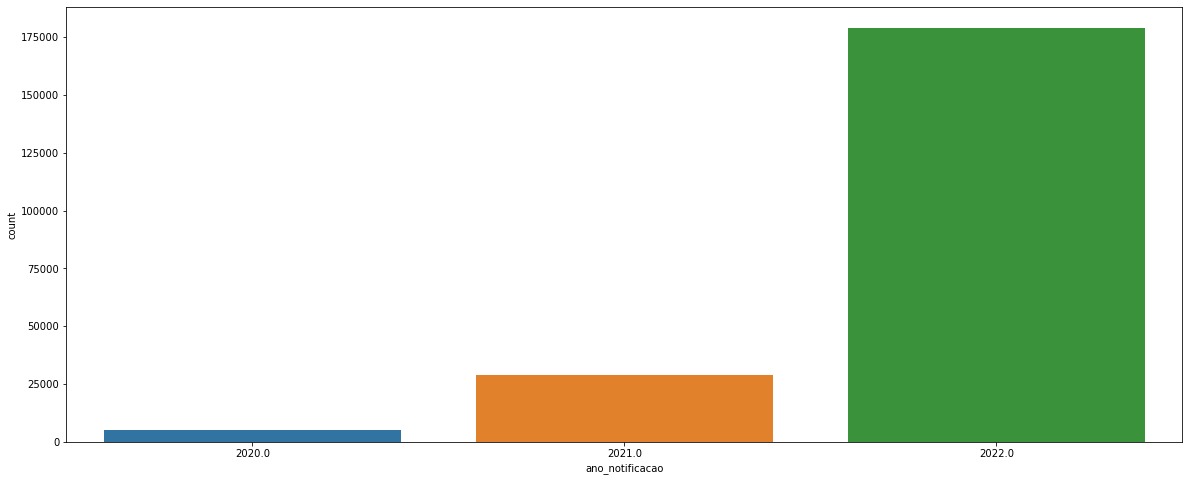

In [19]:
plt.figure(figsize=(20,8))
sns.countplot(df['ano_notificacao'])

In [20]:
parsed_df = df[['ano_notificacao', 'mes_notificacao', 'dia_notificacao', 'recuperado', 'obito']].copy()
dead_grouped_by_date = {}
infected_grouped_by_date = {}

for data_point in parsed_df.values:
    year, month, day = data_point[0], data_point[1], data_point[2]
    recovered, dead = data_point[3], data_point[4]
    key = f'{day}/{month}/{year}'

    if key in dead_grouped_by_date.keys():
        dead_grouped_by_date[key] += dead
    else:
        dead_grouped_by_date[key] = dead

    if key in infected_grouped_by_date.keys():
        infected_grouped_by_date[key] += 1
    else:
        infected_grouped_by_date[key] = 1

In [21]:
dead_count_avg = pd.DataFrame(dead_grouped_by_date.items(), columns=['date', 'count'])
dead_count_avg['date'] = pd.to_datetime(dead_count_avg.date, errors='coerce', format='%m%d%Y')
dead_count_avg = dead_count_avg.sort_values(by="date")

infected_count_avg = pd.DataFrame(infected_grouped_by_date.items(), columns=['date', 'count'])
infected_count_avg['date'] = pd.to_datetime(infected_count_avg.date,  errors='coerce', format='%m%d%Y')
infected_count_avg = infected_count_avg.sort_values(by="date")

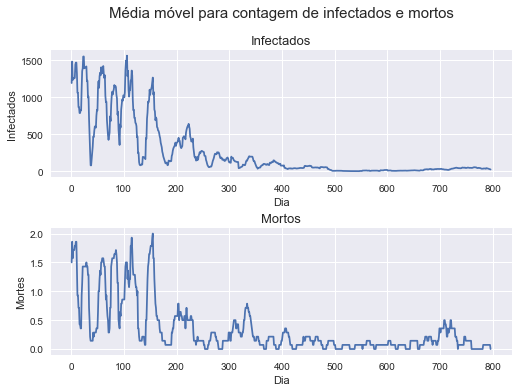

In [22]:
gap = 14
infected_results = []
count = 0
while count < len(infected_count_avg) - gap + 1:
    group = infected_count_avg['count'].values[count : count + gap]
    group_avg = sum(group) / gap
    infected_results.append(group_avg)
    count +=1

infected_day_month = []
for day in range(1, len(infected_results) + 1):
    infected_day_month.append(day)

dead_results = []
count = 0
while count < len(dead_count_avg) - gap + 1:
    group = dead_count_avg['count'].values[count : count + gap]
    group_avg = sum(group) / gap
    dead_results.append(group_avg)

    count +=1

dead_day_month = []
for day in range(1, len(dead_results) + 1):
    dead_day_month.append(day)

plt.style.use('seaborn')

fig, axs = plt.subplots(2)
fig.suptitle('Média móvel para contagem de infectados e mortos', fontsize=15)
axs[0].set_title('Infectados', fontsize=13)
axs[1].set_title('Mortos', fontsize=13)

# Visualizar gráfico de médias móveis
axs[0].set(xlabel='Dia', ylabel='Infectados')
axs[0].plot(infected_day_month, infected_results)

# Visualizar gráfico de médias móveis
axs[1].set(xlabel='Dia', ylabel='Mortes')
axs[1].plot(dead_day_month, dead_results)

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.87, 
                    wspace=0.4, 
                    hspace=0.4)

plt.show()

In [23]:
infected_df = pd.DataFrame({'date': infected_day_month, 'avg': infected_results})
dead_df = pd.DataFrame({'date': dead_day_month, 'avg': dead_results})

<AxesSubplot:title={'center':'Infectados'}>

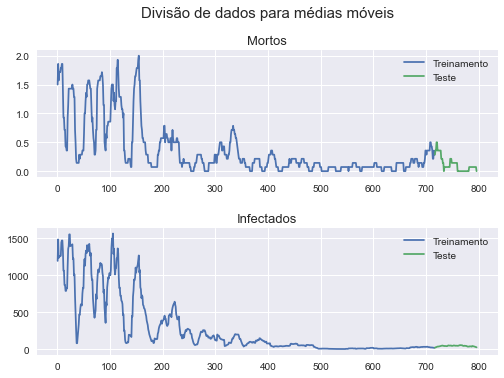

In [24]:
fig, axs = plt.subplots(2)
fig.suptitle('Divisão de dados para médias móveis', fontsize=15)
axs[0].set_title('Mortos', fontsize=13)
axs[1].set_title('Infectados', fontsize=13)

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.87, 
                    wspace=0.4, 
                    hspace=0.4)
             
X = dead_df['date'].values
y = dead_df['avg'].values

train_length = int(len(dead_df)*0.9)
test_length = len(dead_df) - train_length

dead_X_train = X[0:train_length]
dead_y_train = y[0:train_length]

dead_X_test = X[train_length:len(dead_df)]
dead_y_test = y[train_length:len(dead_df)]

sns.lineplot(x=dead_X_train, y=dead_y_train, label='Treinamento', ax=axs[0])
sns.lineplot(x=dead_X_test, y=dead_y_test, label='Teste', ax=axs[0])


X = infected_df['date'].values
y = infected_df['avg'].values

train_length = int(len(infected_df)*0.9)
test_length = len(infected_df) - train_length

infected_X_train = X[0:train_length]
infected_y_train = y[0:train_length]

infected_X_test = X[train_length:len(infected_df)]
infected_y_test = y[train_length:len(infected_df)]

sns.lineplot(x=infected_X_train, y=infected_y_train, label='Treinamento', ax=axs[1])
sns.lineplot(x=infected_X_test, y=infected_y_test, label='Teste', ax=axs[1])

In [25]:
# SVR
svr = SVR()
svr.fit(infected_X_train.reshape(-1, 1), infected_y_train)
svr_preds = svr.predict(infected_X_test.reshape(-1, 1))
svr_mse = mean_squared_error(infected_y_test, svr_preds)
svr_rmse = np.sqrt(svr_mse)

In [26]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('std_scaler', StandardScaler())
])
# Infectados
transformed_infected_X_train = num_pipeline.fit_transform(infected_X_train.reshape(-1, 1))
transformed_infected_X_test = num_pipeline.fit_transform(infected_X_test.reshape(-1, 1))

transformed_infected_y_train = num_pipeline.fit_transform(infected_y_train.reshape(-1, 1))
transformed_infected_y_test = num_pipeline.fit_transform(infected_y_test.reshape(-1, 1))

# Óbitos
transformed_dead_X_train = num_pipeline.fit_transform(dead_X_train.reshape(-1, 1))
transformed_dead_X_test = num_pipeline.fit_transform(dead_X_test.reshape(-1, 1))

transformed_dead_y_train = num_pipeline.fit_transform(dead_y_train.reshape(-1, 1))
transformed_dead_y_test = num_pipeline.fit_transform(dead_y_test.reshape(-1, 1))

In [27]:
%%capture

# SVR
param_grid = [
    {
        'C': [2.0, 2.1, 2.2, 2.5, 2.7, 3.0, 4.0, 5.0, 50],
        'degree': [-1, 1, 1.5, 2, 3, 4, 5],
        'epsilon': [0.1, 0.2, 0.3, 0.5, 0.7]
    },
]

infected_svr_grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error')
infected_svr_grid_search.fit(transformed_infected_X_train, transformed_infected_y_train)
dead_svr_grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error')
dead_svr_grid_search.fit(transformed_dead_X_train, transformed_dead_y_train)

In [28]:
print('---'*9)
print('SVR')
print('Infected: ', infected_svr_grid_search.best_params_)
print('Dead: ', dead_svr_grid_search.best_params_)

---------------------------
SVR
Infected:  {'C': 2.0, 'degree': 1, 'epsilon': 0.1}
Dead:  {'C': 2.0, 'degree': 1, 'epsilon': 0.2}


<AxesSubplot:>

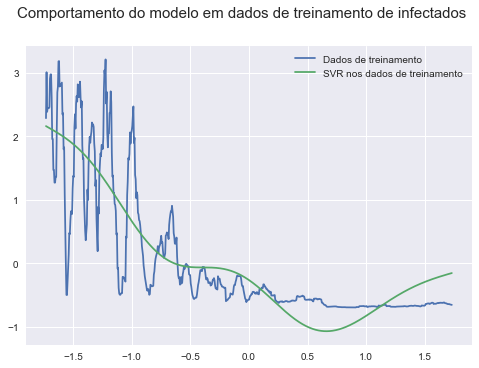

In [29]:
# SVR
svr = SVR(C=50, degree=1, epsilon=0.5)
svr.fit(transformed_infected_X_train, transformed_infected_y_train)
svr_preds = svr.predict(transformed_infected_X_test)
svr_mse = mean_squared_error(transformed_infected_y_test, svr_preds)
svr_rmse = np.sqrt(svr_mse)

# Plots

plt.suptitle('Comportamento do modelo em dados de treinamento de infectados', fontsize=15)
sns.lineplot(x=transformed_infected_X_train.reshape(-1), y=transformed_infected_y_train.reshape(-1), label='Dados de treinamento')
sns.lineplot(x=transformed_infected_X_train.reshape(-1), y=svr.predict(transformed_infected_X_train), label='SVR nos dados de treinamento')

<AxesSubplot:>

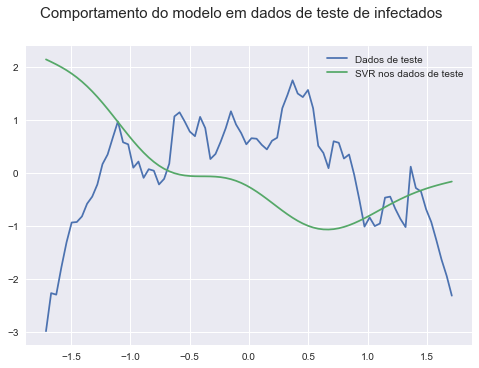

In [30]:
plt.suptitle('Comportamento do modelo em dados de teste de infectados', fontsize=15)
sns.lineplot(x=transformed_infected_X_test.reshape(-1), y=transformed_infected_y_test.reshape(-1), label='Dados de teste')
sns.lineplot(x=transformed_infected_X_test.reshape(-1), y=svr_preds.reshape(-1), label='SVR nos dados de teste')

In [31]:
print('###'*9)
print('SVR')
print('---'*9)
print('Score: ', svr.score(transformed_infected_X_test, transformed_infected_y_test))
print('R-2: ', metrics.r2_score(transformed_infected_y_test, svr_preds))
print('Absolute Error: ', metrics.mean_absolute_error(transformed_infected_y_test, svr_preds))
print('RMSE: ', svr_rmse)

###########################
SVR
---------------------------
Score:  -1.6450192726807114
R-2:  -1.6450192726807114
Absolute Error:  1.2185829595657505
RMSE:  1.6263515218674933


<AxesSubplot:>

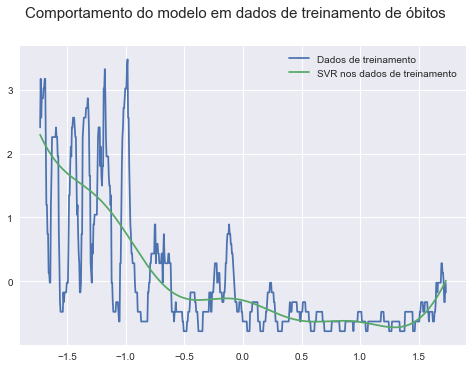

In [32]:
# SVR
svr = SVR(C=50, degree=1, epsilon=0.3)
svr.fit(transformed_dead_X_train, transformed_dead_y_train)
svr_preds = svr.predict(transformed_dead_X_test)
svr_mse = mean_squared_error(transformed_dead_y_test, svr_preds)
svr_rmse = np.sqrt(svr_mse)

# Plots

plt.suptitle('Comportamento do modelo em dados de treinamento de óbitos', fontsize=15)
sns.lineplot(x=transformed_dead_X_train.reshape(-1), y=transformed_dead_y_train.reshape(-1), label='Dados de treinamento')
sns.lineplot(x=transformed_dead_X_train.reshape(-1), y=svr.predict(transformed_dead_X_train), label='SVR nos dados de treinamento')

<AxesSubplot:>

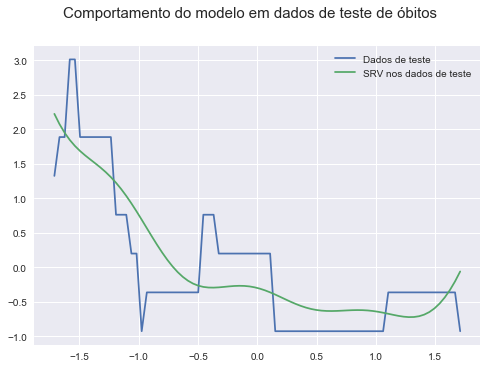

In [33]:
plt.suptitle('Comportamento do modelo em dados de teste de óbitos', fontsize=15)
sns.lineplot(x=transformed_dead_X_test.reshape(-1), y=transformed_dead_y_test.reshape(-1), label='Dados de teste')
sns.lineplot(x=transformed_dead_X_test.reshape(-1), y=svr_preds.reshape(-1), label='SRV nos dados de teste')

In [34]:
print('###'*9)
print('SVR')
print('---'*9)
print('Score: ', svr.score(transformed_dead_X_test, transformed_dead_y_test))
print('R-2: ', metrics.r2_score(transformed_dead_y_test, svr_preds))
print('Absolute Error: ',metrics.mean_absolute_error(transformed_dead_y_test, svr_preds))
print('RMSE: ', svr_rmse)

###########################
SVR
---------------------------
Score:  0.7208443171911385
R-2:  0.7208443171911385
Absolute Error:  0.4465695933616848
RMSE:  0.5283518551201098
